In [ ]:
#here to analyze and find interesting patterns to understand data from year 2014,2015 and 2016.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#other imports

import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

In [9]:
CostShare_df = pd.read_csv("C:/Users/BRPC015042/Desktop/Python/kaggle/Seguro saude EUa/BenefitsCostSharing.csv")

C:\Users\BRPC015042\AppData\Local\Temp\ipykernel_9808\2421995997.py:1: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.



In [10]:
CostShare_df.head(n=10)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,113,HIOS,21989AK0010001,AK,AK,6
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,114,HIOS,21989AK0010001,AK,AK,6
7,Major Dental Care - Adult,2014,50%,NaN,50%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,115,HIOS,21989AK0010001,AK,AK,6
8,Accidental Dental,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,118,HIOS,21989AK0010001,AK,AK,6
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK,AK,6


In [11]:
# Fill empty and NaNs values with NaN
CostShare_df = CostShare_df.fillna(np.nan)

# Check for Null values
CostShare_df.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

In [12]:
print ('Total records in file:%d' %CostShare_df.BenefitName.count())
print ('Unique benefits pesent in the file:%d' %CostShare_df.BenefitName.nunique())

Total records in file:5048408
Unique benefits pesent in the file:861


In [13]:
# Summary and statistics
CostShare_df.describe()

,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [14]:
# vamos analisar qual tipo de beneficio está no topo da tablea em um determinado ano comercial

CostShare_df[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164869    496  Routine Dental Services (Adult)  18719
2015             2079286    517              Orthodontia - Adult  31269
2016             1804253    429              Orthodontia - Adult  27389

In [15]:
# vamos analisar a utilização entre estados americanos - filtramos os dados e plotamos em seguida

CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = CostShare_df.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(CostShare_df[CostShare_df["StateCode"] == state])    
    benefitarray.append(state_benefit)



C:\Users\BRPC015042\AppData\Local\Temp\ipykernel_9808\3407022238.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



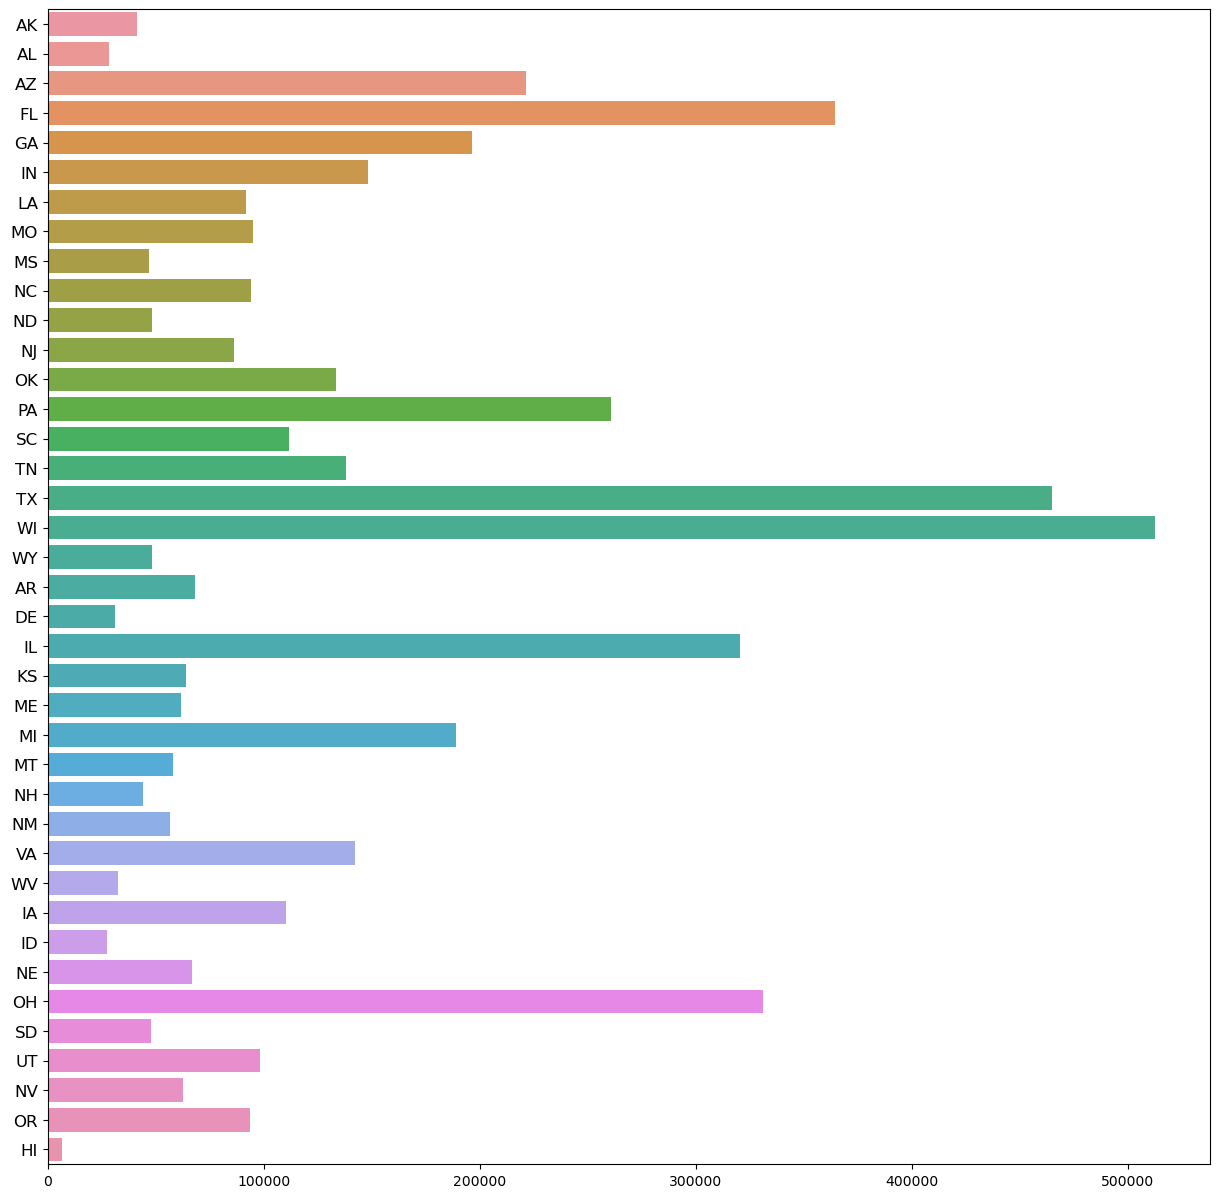

In [16]:
# plotando

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(Unique_State, rotation='horizontal', fontsize='large')
g = sns.barplot(y = Unique_State,x=benefitarray)
plt.show()

C:\Users\BRPC015042\AppData\Local\Temp\ipykernel_9808\123126022.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



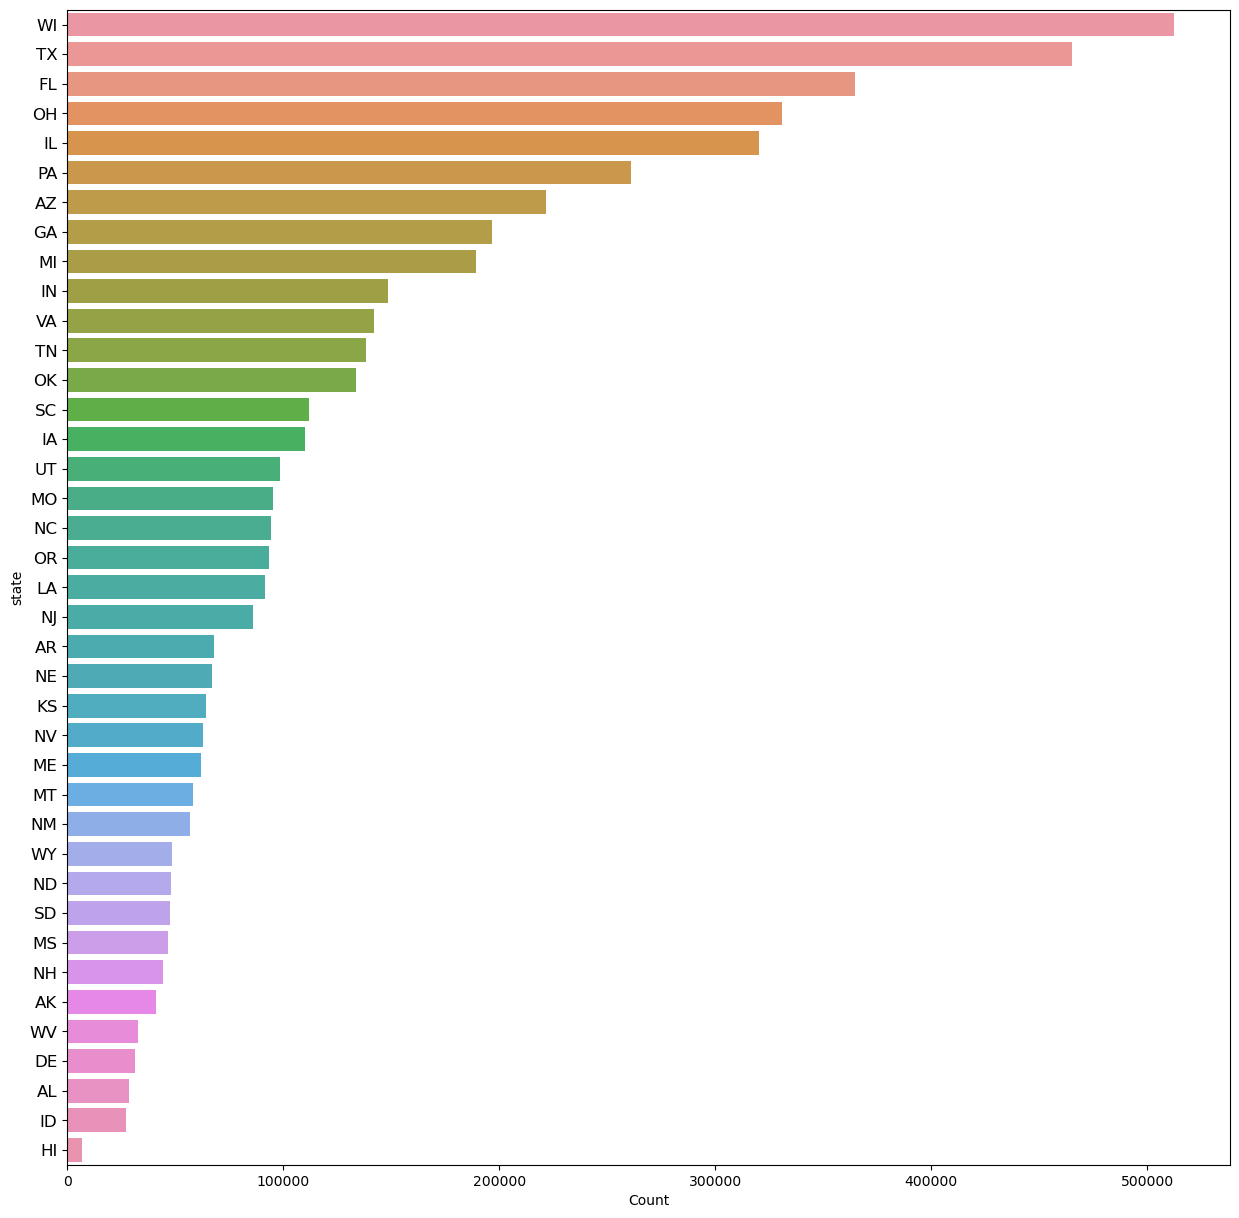

In [17]:
# vamos indexar por plano vendido por estado

df = pd.DataFrame(
    {'state': Unique_State,
     'Count' : benefitarray
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

In [26]:
# vamos plotar no mapa americano para melhorar o entendimento

data = dict(type='choropleth',
            locations=df['state'],
            locationmode='USA-states',
            colorscale=[
                [0, 'green'],
                [0.25, 'yellow'],
                [0.5, 'blue'],
                [0.75, 'red'],
                [1, 'red']
            ],
            #text=df['state'],
            text=df['state'] + '<br>' + df['Count'].astype(str),  # Combina sigla do estado e valor
            hoverinfo='text',  # Adicionando esta linha para mostrar a sigla do estado
            marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
            z=df['Count'],
            colorbar={'title': 'No of Benefit plans'})

layout = dict(title='Benefit plan spread across state',
              geo=dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'))

choromap2 = go.Figure(data=[data], layout=layout)
iplot(choromap2)

In [27]:
#vamos ver o plano mais adquirido pela população por estado 

CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84  Routine Dental Services (Adult)   720
AL              28417    115  Routine Dental Services (Adult)   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195        Major Dental Care - Adult  3345
DE              31370    110              Orthodontia - Adult   602
FL             364742    194              Orthodontia - Child  5130
GA             196579    151  Routine Dental Services (Adult)  2893
HI               6741     76  Routine Dental Services (Adult)   110
IA             110221    104     Dental Check-Up for Children  1727
ID              27313     71     Dental Check-Up for Children   447
IL             320533    157              Orthodontia - Adult  4299
IN             148531    109        Major Dental Care - Adult  2347
KS              64279     82     Dental Check-Up for Children  1087
LA              91816    125  Routine Dental Services (Adult)  1491
ME              61834     99        Basic Dental Care - Child   975
MI             189225    205        Basic Dental Care - Child  3248
MO              95152    127              Orthodontia - Child  1577
MS              46895    104        Basic Dental Care - Adult   725
MT              58132     75        Basic Dental Care - Child  1049
NC              94290     98        Major Dental Care - Adult  1537
ND              48269     77                Accidental Dental   974
NE              66935     90        Major Dental Care - Adult  1238
NH              44305     98        Major Dental Care - Adult   707
NJ              86107    100              Orthodontia - Adult  1357
NM              56669     78              Orthodontia - Adult   828
NV              62743    121     Dental Check-Up for Children   930
OH             331045    193     Dental Check-Up for Children  5092
OK             133639     83        Major Dental Care - Adult  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157  Routine Dental Services (Adult)  4208
SC             111907     85              Orthodontia - Child  1817
SD              47730     79              Orthodontia - Adult   843
TN             138154    129        Basic Dental Care - Adult  2073
TX             465164    180                Accidental Dental  6441
UT              98421    101        Major Dental Care - Adult  1527
VA             142236    145                Accidental Dental  2256
WI             512587    146        Basic Dental Care - Adult  7135
WV              32638     77        Basic Dental Care - Child   625
WY              48425     92     Dental Check-Up for Children   807

In [30]:
CoinsInnTier1 = []
YearBusiness = []
StateCode = []
CoinsInnTier1_real = np.asarray(CostShare_df.CoinsInnTier1)
            
for i, cn in enumerate(CoinsInnTier1_real):
       if (str(cn) == 'nan' or str(cn) == '$0' or str(cn) == 'Not Applicable') :
             continue     
       else :
             if  cn.replace("%","").strip().split(' ')[0] != 'No' :   
                 CoinsInnTier1.append(cn.replace("%","").strip().split(' ')[0])
                 YearBusiness.append(CostShare_df.BusinessYear[i])
                 StateCode.append(CostShare_df.StateCode[i])

In [31]:
CoinsInnTier1
CoinsInnTier1 = pd.to_numeric(CoinsInnTier1, errors='coerce')
Codf = pd.DataFrame(
    {'Coinsurance1': CoinsInnTier1,
      'YearBusiness' : YearBusiness,
      'StateCode' : StateCode
     })
Codf['Coinsurance1'].value_counts().head(5)

Coinsurance1
0     872967
20    699602
30    353429
50    221323
10    208094
Name: count, dtype: int64

In [37]:
Codf.groupby('YearBusiness').sum()

,Coinsurance1,StateCode
YearBusiness,,
2014,11196497,AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...
2015,18985158,AZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZ...
2016,16426782,AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...


In [38]:
Coinsarray = []

Unique_Coinsurance = Codf.Coinsurance1.unique()
for Coinsurance in Unique_Coinsurance:
    Freq_Coinsurance =  len(Codf[Codf["Coinsurance1"] == Coinsurance])    
    Coinsarray.append(Freq_Coinsurance) 

In [39]:
Coins_df = pd.DataFrame(
    {'Coinsurance': Unique_Coinsurance,
     'Coinsfrequency' : Coinsarray
     })

Coins_df = Coins_df.sort_values("Coinsfrequency", ascending=False).reset_index(drop=True)

Coins_df

,Coinsurance,Coinsfrequency
0,0,872967
1,20,699602
2,30,353429
3,50,221323
4,10,208094
...,...,...
64,47,4
65,29,3
66,56,2
67,43,2


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
C:\Users\BRPC015042\AppData\Local\Temp\ipykernel_9808\656257883.py:45: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Iniciando o processamento...
Processamento concluído.


C:\Users\BRPC015042\AppData\Local\Temp\ipykernel_9808\656257883.py:46: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\BRPC015042\AppData\Local\Temp\ipykernel_9808\656257883.py:47: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




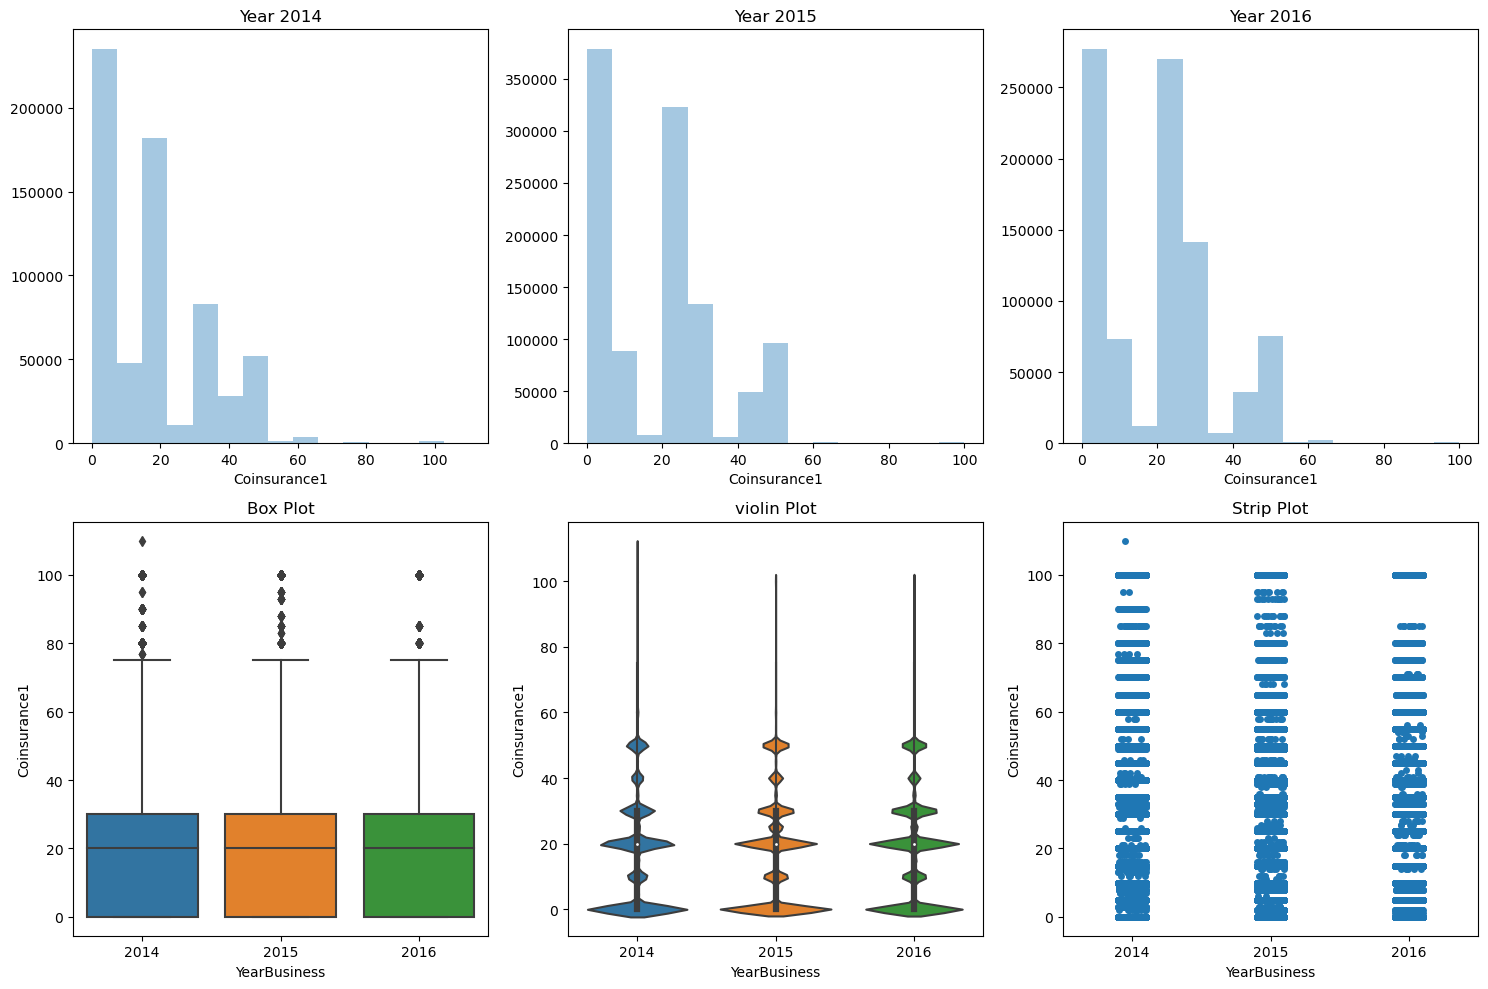

In [41]:
from tqdm import tqdm
import time

# Loop de exemplo
for i in tqdm(range(10)):
    time.sleep(0.5)  # Simula uma operação demorada
    
print("Iniciando o processamento...")
# Código de processamento aqui
print("Processamento concluído.")

    

#visualizando por gráficos

fig, ax = plt.subplots(figsize=(15,10), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .8     # the amount of width reserved for blank space between subplots
hspace =  1.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.0

ax[0][0].set_title("Year 2014", y = y_title_margin)
ax[0][1].set_title("Year 2015", y = y_title_margin)
ax[0][2].set_title("Year 2016", y = y_title_margin)
ax[1][0].set_title("Box Plot", y = y_title_margin)
ax[1][1].set_title("violin Plot", y = y_title_margin)
ax[1][2].set_title("Strip Plot", y = y_title_margin)

sns.distplot(Codf[Codf['YearBusiness'] == 2014]['Coinsurance1'],kde=False,bins=15,ax=ax[0][0])
sns.distplot(Codf[Codf['YearBusiness'] == 2015]['Coinsurance1'],kde=False,bins=15,ax=ax[0][1])
sns.distplot(Codf[Codf['YearBusiness'] == 2016]['Coinsurance1'],kde=False,bins=15,ax=ax[0][2])
sns.boxplot(x='YearBusiness',y='Coinsurance1',data=Codf,ax=ax[1][0])
sns.violinplot(x='YearBusiness',y='Coinsurance1',data=Codf,ax=ax[1][1])
sns.stripplot(x='YearBusiness',y='Coinsurance1',data=Codf,jitter=True,ax=ax[1][2])
plt.tight_layout()
  
    